In [14]:
# A1. Write your own functions to evaluate the following for vectors, A & B where A & B are vectors in N-dimensional space  1) Dot product between A & B. 2)Length of Vectors with Euclidean Norm
import numpy as numpy
vector_a = numpy.array([1, 2, 3])
vector_b = numpy.array([4, 5, 6])
dot_product = numpy.dot(vector_a, vector_b)
print(f"Dot product: {dot_product}")
Euclidean_norm_a=numpy.linalg.norm(vector_a)
Euclidean_norm_b=numpy.linalg.norm(vector_b)
print("Length of Vector A with Euclidean Norm: ", Euclidean_norm_a)
print("Length of Vector B with Euclidean Norm: ",Euclidean_norm_b)

Dot product: 32
Length of Vector A with Euclidean Norm:  3.7416573867739413
Length of Vector B with Euclidean Norm:  8.774964387392123


In [4]:
#A2. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If your data deals with multiple classes, you can take any two classes. Steps below (refer below diagram for understanding): a)Write your function for calculation of mean, variance and standard deviation for a set of data. Use this functions to develop a function for calculation of the values for a dataset represented as a matrix with columns as features. b)Calculate the mean for each class (also called as class centroid)
#(Suggestion: You may use numpy.mean() function for finding the average vector for all vectors in a given class. Please define the axis property appropriately to use this function. EX: feat_vecs.mean(axis=0))
#Calculate spread (standard deviation) for each class (Suggestion: You may use numpy.std() function for finding the standard deviation vector for all vectors in a given class. Please define the axis property appropriately to use this function.)
#Calculate the distance between mean vectors between classes. (Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean distance between two centroids.)

import pandas as pd
import numpy as np
import math

file_path = r'C:\Users\preet\ML_Lab3\MUSE_20180118_175237_22000.csv'
df = pd.read_csv(file_path)

numeric_df = df.select_dtypes(include='number')

def mean(data):
    return np.mean(data)

def std_dev(data):
    return np.std(data)


for col in numeric_df.columns:
    data = numeric_df[col].values   
    print(f"\nFeature: {col}")
    print("Mean:", mean(data))
    print("Std Dev:", std_dev(data))

labels = df.iloc[:, -1]

unique_classes = labels.unique()

class1 = unique_classes[0]
class2 = unique_classes[1]

data1 = numeric_df[labels == class1]
data2 = numeric_df[labels == class2]

centroid1 = np.mean(data1, axis=0)
centroid2 = np.mean(data2, axis=0)

print("Centroid of Class", class1)
print(centroid1)

print("Centroid of Class", class2)
print(centroid2)

spread1 = np.std(data1, axis=0)
spread2 = np.std(data2, axis=0)

print("Intraclass Spread of Class", class1)
print(spread1)

print("Intraclass Spread of Class", class2)
print(spread2)


interclass_distance = np.linalg.norm(centroid1 - centroid2)

print("Interclass Distance between two classes:")
print(interclass_distance)



Feature: I
Mean: -2.6986400000000006
Std Dev: 88.50162085606341

Feature: II
Mean: 0.4450559999999994
Std Dev: 116.98296288963132

Feature: III
Mean: 3.1436959999999994
Std Dev: 48.628509831369335

Feature: aVR
Mean: 2.363871999999999
Std Dev: 100.84925359390428

Feature: aVL
Mean: -4.124575999999999
Std Dev: 40.94597346773214

Feature: aVF
Mean: 0.5621760000000002
Std Dev: 77.86619644123518

Feature: V1
Mean: 1.3371199999999983
Std Dev: 327.8854286982964

Feature: V2
Mean: -4.804848000000004
Std Dev: 397.28468020865955

Feature: V3
Mean: -0.7144319999999993
Std Dev: 254.1016031414941

Feature: V4
Mean: 2.248704000000003
Std Dev: 204.04110804894287

Feature: V5
Mean: -13.846511999999999
Std Dev: 215.9810025123364

Feature: V6
Mean: -0.7603039999999983
Std Dev: 120.41224984820933
Centroid of Class 219.6
I       63.44
II     141.52
III     78.08
aVR   -102.48
aVL     -7.32
aVF    109.80
V1      -9.76
V2      56.12
V3     402.60
V4     595.36
V5     446.52
V6     219.60
dtype: float64
Ce

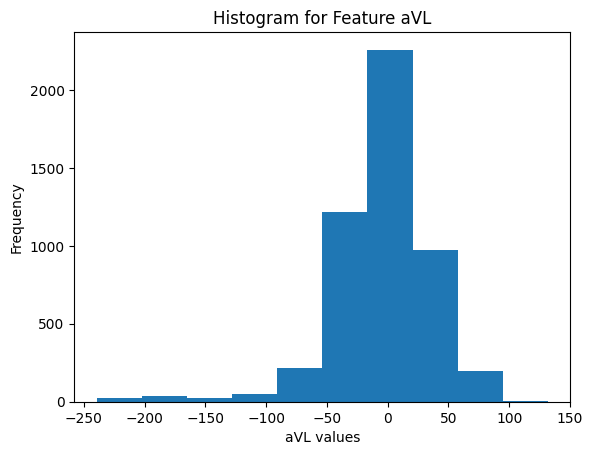

Mean of aVL: -4.124575999999999
Variance of aVL: 1676.572743220224


In [7]:
#A3 Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and variance from the available data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\preet\ML_Lab3\MUSE_20180118_175237_22000.csv'
df = pd.read_csv(file_path)

feature_extracted = df['aVL']

plt.hist(feature_extracted, bins=10)
plt.xlabel("aVL values")
plt.ylabel("Frequency")
plt.title("Histogram for Feature aVL")
plt.show()


mean_value = np.mean(feature_extracted)
variance_value = np.var(feature_extracted)

print("Mean of aVL:", mean_value)
print("Variance of aVL:", variance_value)


Minkowski distance for p=1: 367771.43999999994
Minkowski distance for p=2: 9715.057866878613
Minkowski distance for p=3: 3533.068885080025
Minkowski distance for p=4: 2230.58352509822
Minkowski distance for p=5: 1718.219458153979
Minkowski distance for p=6: 1455.352996652099
Minkowski distance for p=7: 1299.585579042896
Minkowski distance for p=8: 1198.6024801144442
Minkowski distance for p=9: 1128.9848653523613
Minkowski distance for p=10: 1078.7781849134874


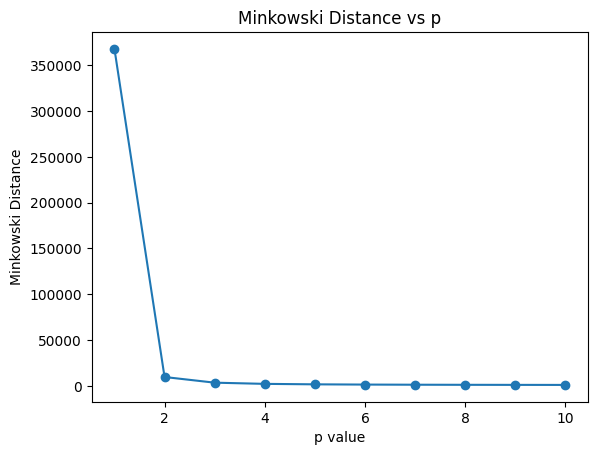

In [11]:
#A4 Take any two feature vectors from your dataset. Calculate the Minkwoski distance with p from 1 to 10. Make a plot of the distance and observe the nature of this graph. Develop your own function for calculation of the Minkowski distance metric.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'C:\Users\preet\ML_Lab3\MUSE_20180118_175237_22000.csv'
df = pd.read_csv(file_path)

feature_extracted_1 = df['V4']
feature_extracted_2 = df['V6']

def minkowski_distance(feature_extracted_1,feature_extracted_2,p):
    return np.power(np.sum(np.abs(feature_extracted_1 - feature_extracted_2) ** p), 1/p)

p_values = range(1, 11)
distances = []

for p in p_values:
    d = minkowski_distance(feature_extracted_1,feature_extracted_2,p)
    distances.append(d)
    print(f"Minkowski distance for p={p}: {d}")

plt.plot(p_values, distances, marker='o')
plt.xlabel("p value")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance vs p")
plt.show()


In [ ]:
#A5 Compare the distance values for 2 vectors in your dataset using your own developed functions and the package function available as scipy.spatial.distance.minkowski().


In [29]:
!pip install -U scikit-learn
#A6 Divide dataset in your project into two parts – train & test set. To accomplish this, use the train-test_split() function available in SciKit
#A7 Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code for help:
#A8 Test the accuracy of the kNN using the test set obtained from above exercise. Following code for help.
#A9 Use the predict() function to study the prediction behavior of the classifier for test vectors. Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the class of the test vector (test_vect is any feature vector from your test set).
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

accuracy = neigh.score(X_test, y_test)
print("Accuracy:", acc)

prediction= neigh.predict(X_test)
print("Predicted:", pred)


Defaulting to user installation because normal site-packages is not writeable
(3500, 11) (1500, 11) (3500,) (1500,)



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.